Линейная регрессия
---
Начало взято из прошлого ноутбука. Дальше все новое.

In [1]:
# Первым делом импортируем. Ну как всегда.
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Это датасет ирисов, загруженный в бибилотеку scikit-learn.
iris = datasets.load_iris()

In [3]:
# Будем делать бинарную классификацию на первых ста ирисах: по 50 каждого класса.
# Но в этот раз без тестового датасета, т.к. цель у нас другая.
x_train = np.vstack((iris.data[:50], iris.data[50:100]))
y_train = np.hstack((iris.target[:50], iris.target[50:100]))

Наглядная демонстрация линейной разделимости - это когда два множества точек можно разделить, проведя между ними линию. Но что делать, если множества двух классов слегка перемешаны? А что если по каким-то признакам получается один класс, а по другим второй?

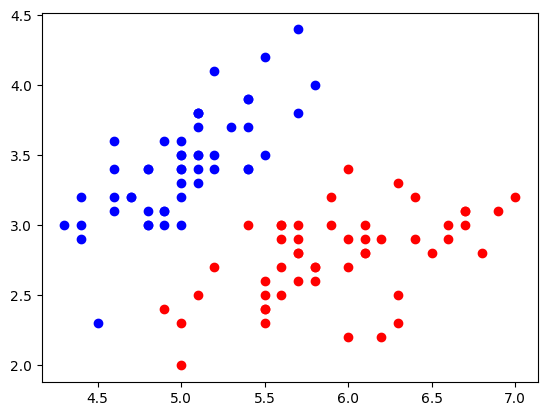

In [4]:
plt.scatter([x[0] for x in x_train[:50]], [x[1] for x in x_train[:50]],  color='blue')
plt.scatter([x[0] for x in x_train[50:]], [x[1] for x in x_train[50:]],  color='red')

plt.show()

Нам нужен тренд!

In [5]:
# Вот эта функция берет на вход два набора точек и ищет коээфициенты прямой,
# которая наиболее близка всем этим точкам. Напоминаю, что уравнение прямой
# вычислется при помощи метода наименьших квадратов, о котором можно почитать
# вот тут: http://mathprofi.ru/metod_naimenshih_kvadratov.html
# Предупреждаю: там формулки! Но это самый внятный ресурс, с которым я когда-
# либо сталкивалась по этой теме.
def linreg(xs, ys):
  ey=sum(ys)
  ex=sum(xs)
  n=len(xs)
  exy=sum([a*b for a,b in zip(xs,ys)])
  ex2=sum([x**2 for x in xs])
  k=(ey*ex-n*exy)/(ex*ex-n*ex2) #coefficient
  b=(exy-k*ex2)/ex #intercept
  return k, b

In [6]:
# Возьмем три точки и построим такую прямую.
x_toy, y_toy=(3, 5, 3.5), (1.5, 4, 6.5)
k_toy, b_toy=linreg(x_toy, y_toy)
# Глянем коэффициенты. Чем больше или меньше k, тем круче наклон.
# Чем больше или меньше b, тем дальше прямая от оси Y.
k_toy, b_toy

(0.5769230769230769, 1.7884615384615385)

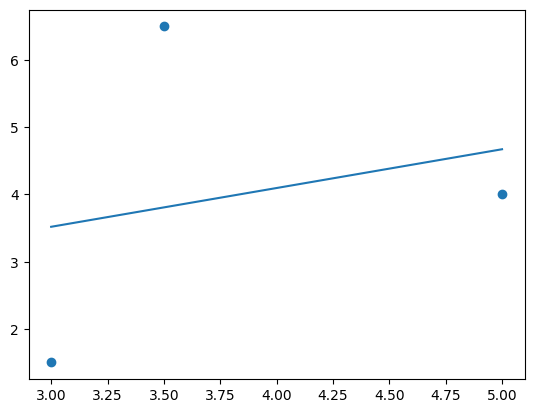

In [7]:
# Глянем результат. Красивое!
plt.plot((3, 5), [k_toy*3+b_toy, k_toy*5+b_toy]) #toy lecture example
plt.scatter(x_toy, y_toy)
plt.show()

0.798528300647193 -0.5694326730398471


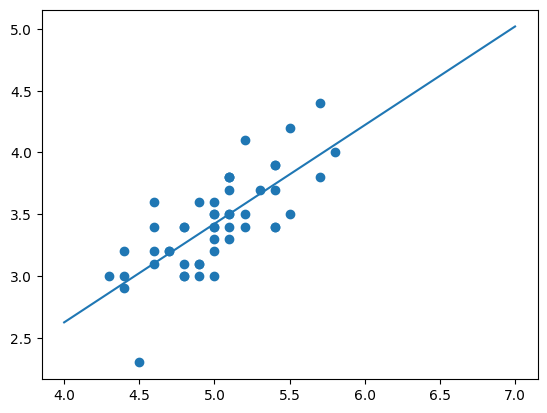

In [8]:
# Глянем на линейную регрессию для первого класса ирисов. Тоже красиво!
k_train, b_train=linreg([x[0] for x in x_train[:50]], [x[1] for x in x_train[:50]])
print(k_train, b_train)
plt.plot((4, 7), [k_train*4+b_train, k_train*7+b_train])
plt.scatter([x[0] for x in x_train[:50]], [x[1] for x in x_train[:50]])
plt.show()

А вот так линейную регрессию надо использовать для классификации.

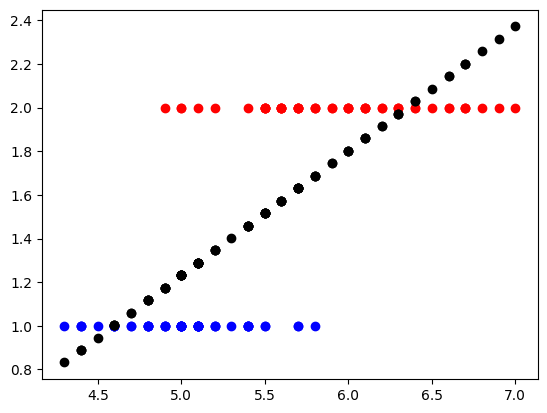

In [9]:
# А теперь сделаем финт ушами. Возьмем снова два класса ирисов, но только первый
# признак. Он будет по оси X. А вот по Y значения пусть будут такие: 1 для
# первого класса и 2 для второго. И для этих точек рассчитаем линейную регрессию.
# Заметьте, только по этому признаку множества не разделимы линейно - одно
# еще не закончилось, а второе уже началось.
k_train_all, b_train_all = linreg([x[0] for x in x_train], [1]*50+[2]*50)
predict_y = []
for x in x_train:
  predict_y.append(k_train_all*x[0]+b_train_all)

plt.scatter([x[0] for x in x_train[:50]], [1]*50, color='blue')
plt.scatter([x[0] for x in x_train[50:100]], [2]*50, color='red')
plt.scatter([x[0] for x in x_train], predict_y, color='black')

plt.show()

In [10]:
# Ну не все идеально классифицировалось в этот раз, но мы взяли только один
# признак, по которому классы не разделимы линейно. Вот и получаем некоторую
# смешанность из 1 и 2, особенно на стыке двух множеств.
for y in predict_y:
    if y <= 1.5:
        print(1)
    else:
        print(2)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
1
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
2
1
2
